## Download IRIS dataset from URL

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#load dataset into Pandas Dataframe
df = pd.read_csv(url, header=None, names=['sepal length','sepal width', 'petal length', 'petal width', 'target'])

## OR Download from SK-Learn Datasets Package OR using Seaborn Package

In [206]:
from sklearn import datasets 
iris = datasets.load_iris()
print(iris.data[0:5]) #shows data as a numpy array

print(type(iris.data))
print(iris.data.dtype) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
<class 'numpy.ndarray'>
float64


In [51]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
   sepal_width  petal_length  petal_width species
0          3.5           1.4          0.2  setosa
1          3.0           1.4          0.2  setosa
2          3.2           1.3          0.2  setosa
3          3.1           1.5          0.2  setosa
4          3.6           1.4          0.2  setosa


In [15]:
df.shape #(number of rows, number of columns)

(150, 5)

In [334]:
df.columns[0:2].tolist() #Two important Data that we will be Analysing

['sepal length', 'sepal width']

In [16]:
df.dtypes #Find data types of each column value

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
target           object
dtype: object

In [17]:
df.head(3) #shows first three rows

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [29]:
df.describe() #Generate descriptive statistics of DataFrame columns.

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.isna().sum() #looks at columns with and looks for np.nan or None values

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

In [24]:
print(df.info()) #prints out column/variable dtypes and row dtypes
#Generally, data type “int64” and “float64” denotes numerical data while data type “object” denotes categorical data.

print('\t')

print(df.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
target          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 5 entries, sepal length to target
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


<b>This means that the variables 'sepal length', 'sepal width', 'petal length', 'petal width' are numerical data, while 'target' is categorical data. </b>

In [31]:
print(df.memory_usage()) #return in bytes

Index             80
sepal length    1200
sepal width     1200
petal length    1200
petal width     1200
target          1200
dtype: int64


## Create an Area Plot, which shows quantative data visually

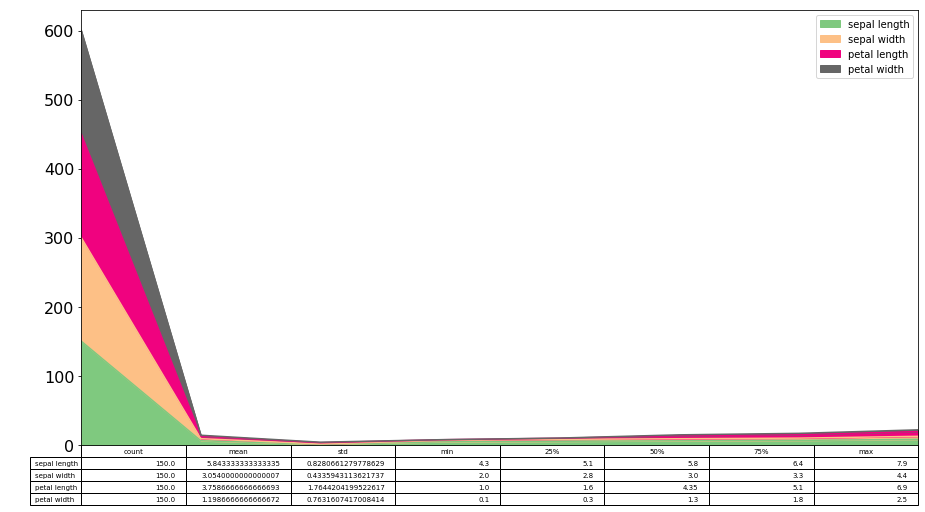

In [3]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)

df.describe().plot(kind = "area", figsize = (15,8), fontsize=16, table = True, colormap="Accent", ax = ax)
plt.show()

## Make bar chart 

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


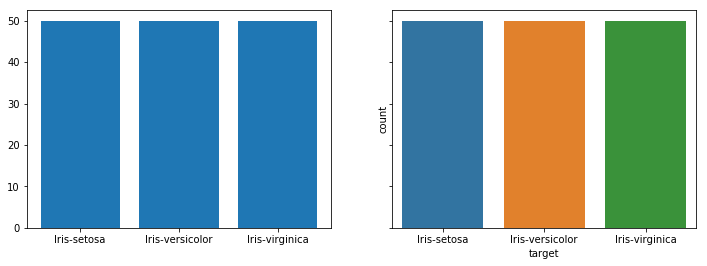

In [39]:
fig, (ax0, ax1) = plt.subplots(1,2, sharey=True, figsize=(12,4))

#Using matplotlib
import matplotlib.pyplot as plt
names = df.target.unique() #find unique values of 'target' column
#counts = df.groupby('target').count()[['sepal length']] #shows as dataframe
counts = df.groupby('target').size() #shows as Series
# target
# Iris-setosa        50
# Iris-versicolor    50
# Iris-virginica     50
# dtype: int64
ax0.bar(names, counts)

#Using Seaborn 
import seaborn as sns
sns.countplot('target', data=df, ax=ax1)

## Make PieChart Using matplotlib

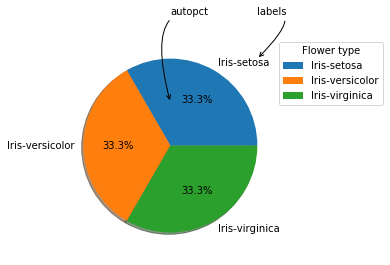

In [53]:
import numpy as np
sizeOfTable = df.target.count() #150
numberOfEachFlowerSpecies = df.target.value_counts() 
# Iris-virginica     50
# Iris-setosa        50
# Iris-versicolor    50
# Name: target, dtype: int64

percent = list(counts/sizeOfTable) # [33.33, 33.33, 33.33]

plt.pie(counts, autopct = '%1.1f%%', shadow=True, labels=names)
plt.legend(names, title="Flower type", bbox_to_anchor=(1, 0, 0.5, 1))
plt.annotate('labels', xy=(1, 1), xytext = (1, 1.5), arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=45"))
plt.annotate('autopct', xy=(0, 0.5), xytext = (0, 1.5), arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-75"))

plt.show()

## Find Petal Length and Petal Width

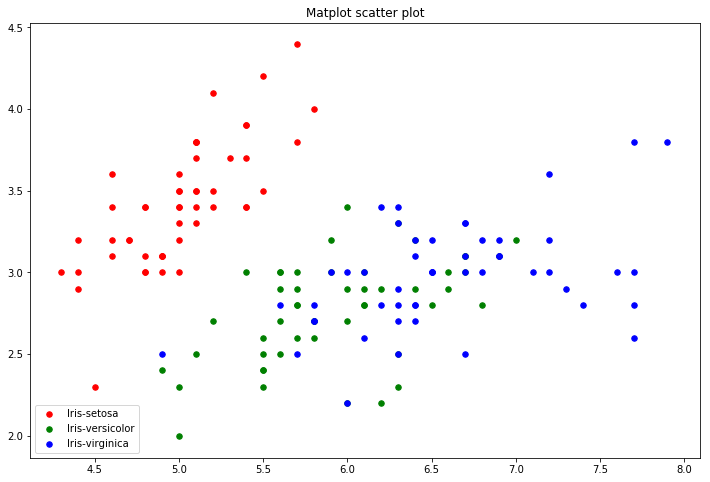

In [55]:
#print(df.head(3))
target_data = df[['sepal length', 'sepal width', 'target']].groupby('target')
colors = ["r", "g", "b"]
names = df.target.unique()

listy = []
for target,data in target_data:
    records = data['sepal length'].to_numpy()
    records2 = data['sepal width'].to_numpy()
    datapoints = (records, records2)
    listy.append(datapoints)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

for data, color, name in zip(tuple(listy), colors, names):
    x,y = data
    ax.scatter(x, y, 
               c=color,
               s=30, 
               label=name)
plt.title('Matplot scatter plot')
plt.legend(loc=3)
plt.show()

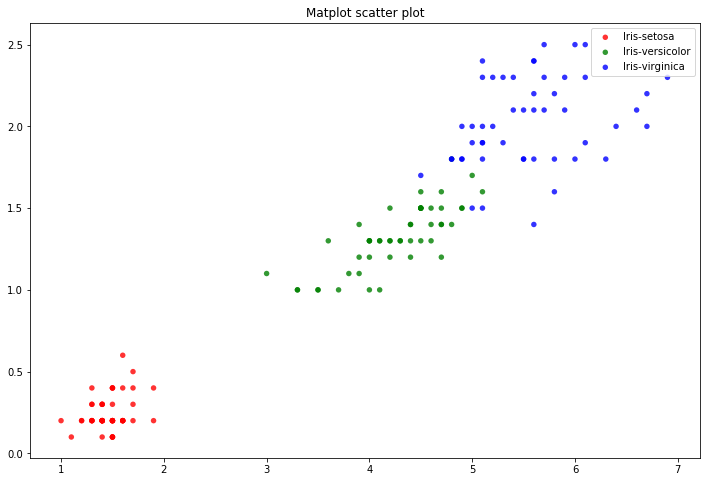

In [59]:
target_data = df[['petal length', 'petal width', 'target']].groupby('target')
colors = ("red", "green", "blue")
names = df.target.unique()

datas = []
for target,data in target_data:
    records = data['petal length'].to_numpy()
    records2 = data['petal width'].to_numpy()
    datapoints = (records, records2)
    datas.append(datapoints)


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

for data, color, name in zip(tuple(datas), colors, names):
    x,y = data
    ax.scatter(x, y, alpha = 0.8, c=color, edgecolors='none', s=30, label=name)
plt.title('Matplot scatter plot')
plt.legend(loc=1)
plt.show()

Text(0.5, 1.0, 'Petal Width')

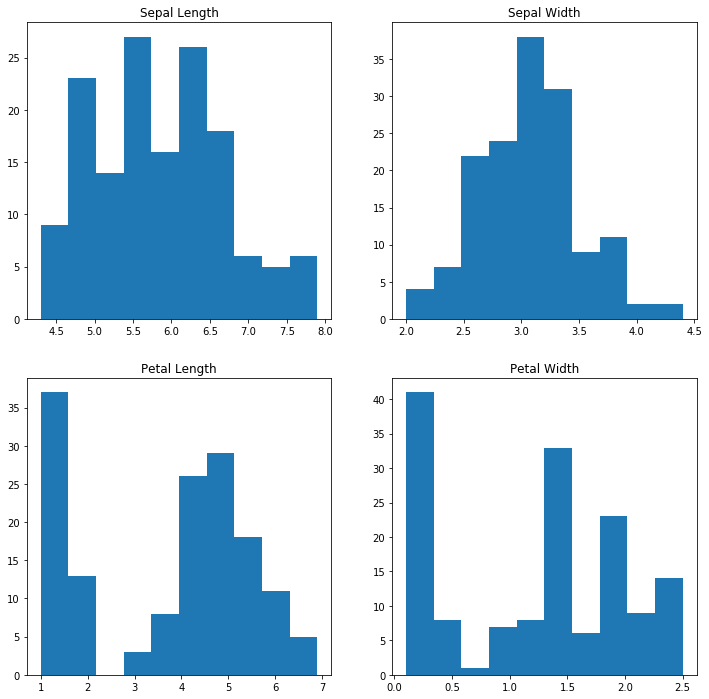

In [355]:
fig = plt.figure(figsize=(12,12))
ax1, ax2, ax3,ax4 = fig.add_subplot(2, 2, 1), fig.add_subplot(2,2, 2), fig.add_subplot(2, 2, 3), fig.add_subplot(2,2, 4)
ax1.hist(df['sepal length'])
ax1.set_title('Sepal Length')
ax2.hist(df['sepal width'])
ax2.set_title('Sepal Width')

ax3.hist(df['petal length'])
ax3.set_title('Petal Length')
ax4.hist(df['petal width'])
ax4.set_title('Petal Width')

# Create a joinplot to describe individual distributions on the same plot between Sepal length and Sepal width
jointplot is good for showing bivariate data and univariate data

## <span style="color:red"> Jointplot to combine Scatter Plot with Histogram </span>

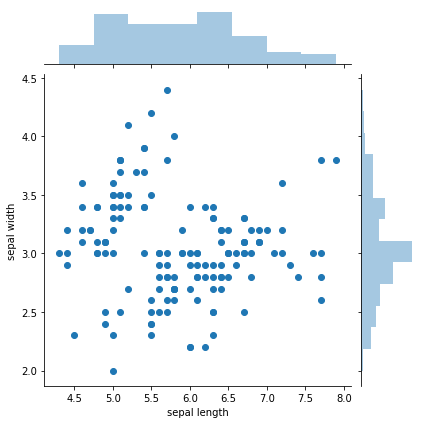

In [371]:
import seaborn as sns

sns.jointplot(x='sepal length', y = 'sepal width', data=df)
plt.show()

## <span style="color:blue"> 2D-Density (HexBin) Plot- Represents 2 numerical variables when there are a lot of data points. Avoid overplotting and too many dots! </span>

## <span style="color:red"> Jointplot to combine Hebxbin Plot and Histogram </span>

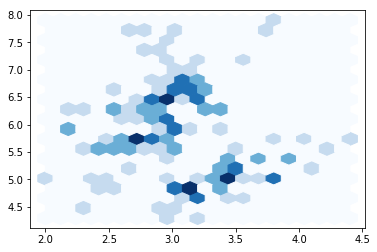

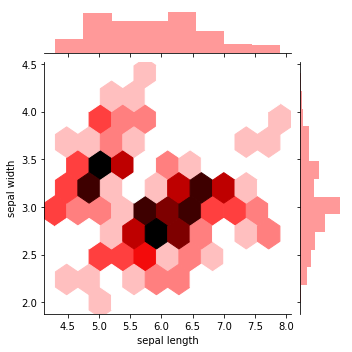

In [525]:
plt.hexbin(x=df['sepal width'], y = df['sepal length'], gridsize=(20,10), cmap=plt.cm.Blues)
#plt.colorbar()

sns.jointplot(x=df["sepal length"], y=df["sepal width"], kind='hex', color='red',height=5)

## <span style="color:red"> Jointplot to combine Contour Plot with Density Estimate Plot </span>

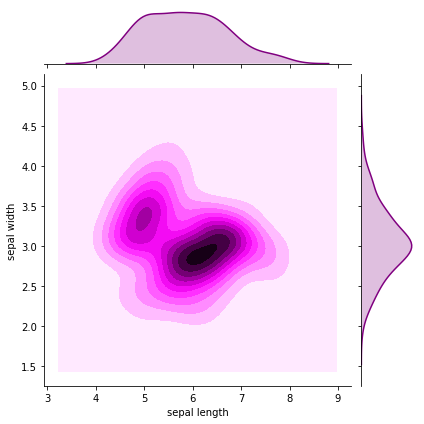

In [374]:
sns.jointplot(x=df["sepal length"], y=df["sepal width"], kind='kde', color='purple')
plt.show()

## <span style = "color: red"> Jointplot Combining Scatterplot to Histogram and Add Regression and KDE fits </span>

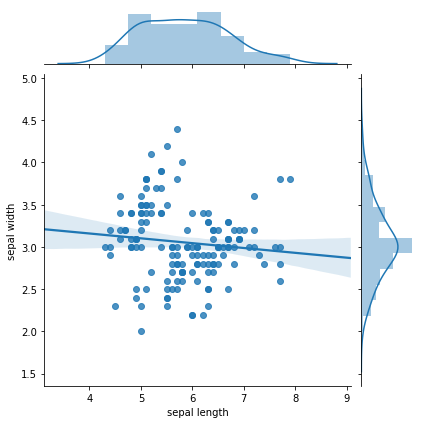

In [376]:
g = sns.jointplot("sepal length", "sepal width", data=df, kind="reg")

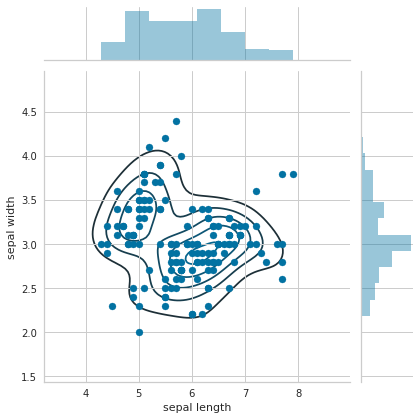

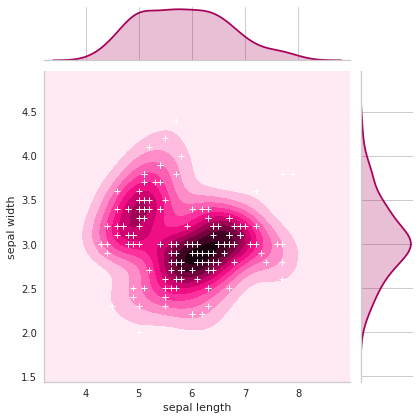

In [205]:
import seaborn as sns
sns.jointplot('sepal length', 'sepal width',data=df).plot_joint(sns.kdeplot, zorder=0, n_levels=5)
#plot_joint adds the kde plot to the jointplot
#n_levels is the number of controu levels (1, draws two circles)
#zorder 

sns.jointplot(x="sepal length", y="sepal width", data=df, kind="kde", color="m").plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
# color = "m" == magenta
# instead of the blue dots you have white crosses (+)
# c is color = white

## Pairplot -- Plot pairwise relationships in a dataset.

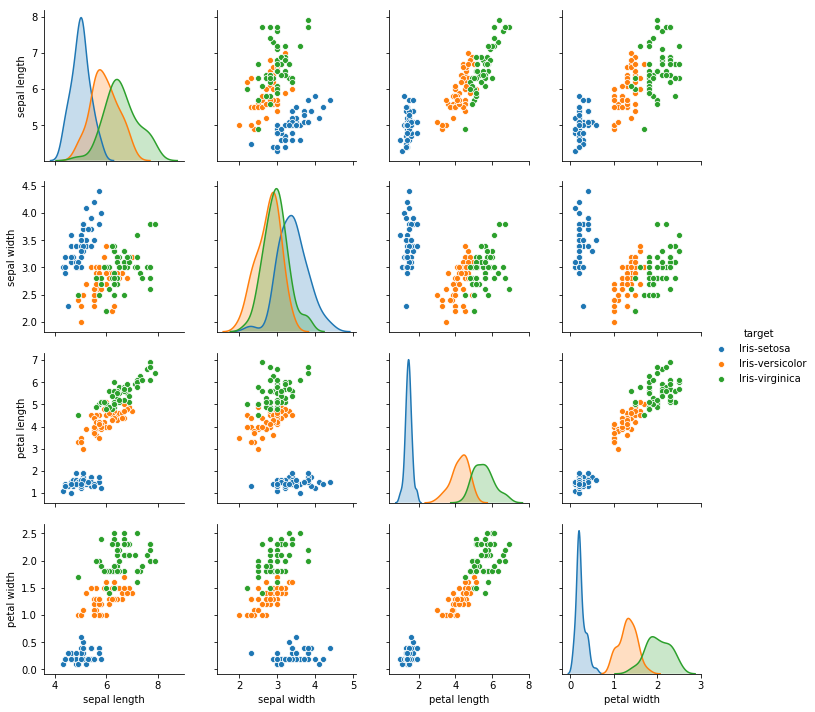

In [406]:
sns.pairplot(data=df, hue = 'target')

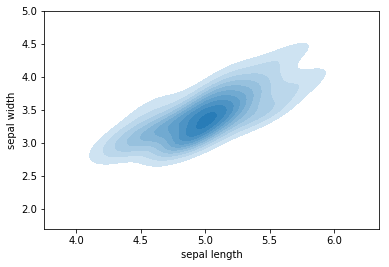

In [432]:
df_setosa = df[df['target'] == 'Iris-setosa']
sns.kdeplot(df_setosa['sepal length'], df_setosa['sepal width'], shade=True, shade_lowest=False); plt.show()

#shades fills in the contour lines
#shade lowest=False removes the shading outside the controu plot

Text(0.5, 5, 'The dots are outliers which \n are the numbers that are either \n extremely high or extremely low \n compared to the rest of the \n numbers in a dataset')

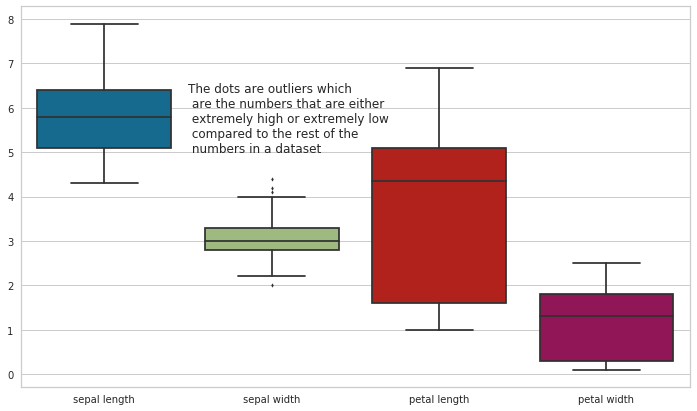

In [46]:
fig, ax = plt.subplots(1,1,figsize=(12,7))

sns.boxplot(data=df, fliersize=3, ax=ax) #fliersize is just the size of the outlier points

#ax.arrow(0, 0, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.text(0.5, 5, "The dots are outliers which \n are the numbers that are either \n extremely high or extremely low \n compared to the rest of the \n numbers in a dataset", transform=ax.transData)


(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

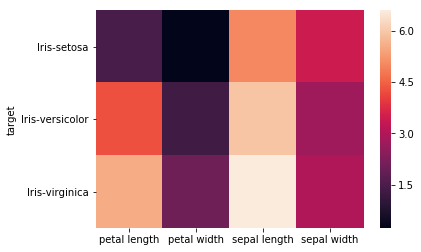

In [23]:
import seaborn as sns
import numpy as np
data = pd.pivot_table(df, values=['sepal length', 'sepal width', 'petal length','petal width'], index=['target'], aggfunc='mean')
g = sns.heatmap(data)
plt.yticks(rotation=0) 

#Another way to do this
#names = df.target.unique()
#g.set_yticklabels(names, rotation=0) 

## K Nearest Neighbors Algorithm

In [3]:
#split the iris dataset into its attributes[features] (X) and labels(y)
X = df.iloc[:, :4].values

y = df.loc[:, ['target']].values

In [47]:
#split the iris dataset into 70% train data and 30% test data
from sklearn.model_selection import train_test_split
#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.30)

#Create KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = knn.predict(X_test)
print(y_pred) #this is a list of 0=iris-setosa, 1=iris-

[2 1 1 2 2 1 1 1 0 2 2 1 1 0 1 1 2 1 0 2 2 2 0 2 1 2 0 2 2 1 1 2 2 2 2 1 0
 0 0 0 0 1 2 2 0]


In [569]:
import numpy as np
#split the iris dataset into 80% train data and 20% test data
from sklearn.model_selection import train_test_split
#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.20)

#Create KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

#Create object of the KNN Classifier
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model/algorithm using the training sets. 
knn.fit(X_train, y_train)

# predict the response
#pred = neigh.predict(X_test)
# evaluate accuracy
#print ("KNeighbors accuracy score : ",accuracy_score(y_test, pred))

# Calculate the accuracy of the model 
print("Accuracy of the model:")
print(knn.score(X_test, np.ravel(y_test)))

Accuracy of the model:
0.9666666666666667


In [574]:
#split the iris dataset into 80% train data and 20% test data
from sklearn.model_selection import train_test_split
#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.20)

#Create KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#Number of neighbors to use by default for kneighbors queries.
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    # Calculate the accuracy of the model 
    print("Accuracy of the model:")
    print(f"For k = {i}, accuracy is", knn.score(X_test, y_test))

Accuracy of the model:
For k = 1, accuracy is 0.9666666666666667
Accuracy of the model:
For k = 2, accuracy is 0.9666666666666667
Accuracy of the model:
For k = 3, accuracy is 0.9666666666666667
Accuracy of the model:
For k = 4, accuracy is 1.0
Accuracy of the model:
For k = 5, accuracy is 0.9666666666666667
Accuracy of the model:
For k = 6, accuracy is 1.0
Accuracy of the model:
For k = 7, accuracy is 0.9666666666666667
Accuracy of the model:
For k = 8, accuracy is 1.0
Accuracy of the model:
For k = 9, accuracy is 0.9333333333333333


[0    1.0
dtype: float64, 0    0.966667
dtype: float64, 0    1.0
dtype: float64, 0    0.966667
dtype: float64, 0    0.966667
dtype: float64, 0    0.966667
dtype: float64, 0    0.966667
dtype: float64, 0    0.933333
dtype: float64, 0    0.933333
dtype: float64, 0    0.933333
dtype: float64]


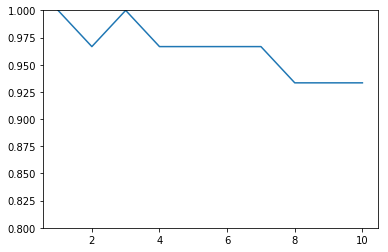

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

a_index=list(range(1,11)) #[1,2,3,4,5,6,7,8,9,10]

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.20)

a =[]
#Number of neighbors to use by default for kneighbors queries.
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
print(a)
plt.ylim(0.8,1)
plt.plot(a_index, a)

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


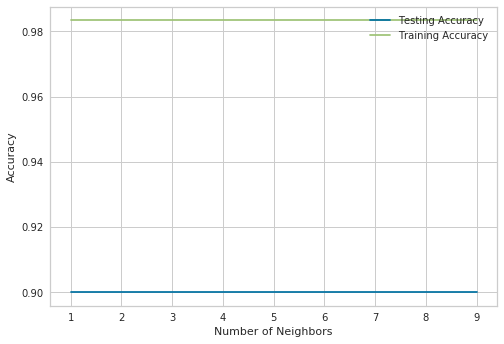

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.20)
knn = KNeighborsClassifier(n_neighbors=7)


accuracy_test = []
accuracy_train = []
#Number of neighbors to use by default for kneighbors queries.
for i in range(1,10):
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    # Calculate the accuracy of the model 
    accuracy_test.append(knn.score(X_test, y_test))
    accuracy_train.append(knn.score(X_train, y_train))
plt.plot(range(1,10), accuracy_test, label = 'Testing Accuracy')
plt.plot(range(1,10), accuracy_train, label='Training Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(loc=1)
plt.show()

### Performance Comparison

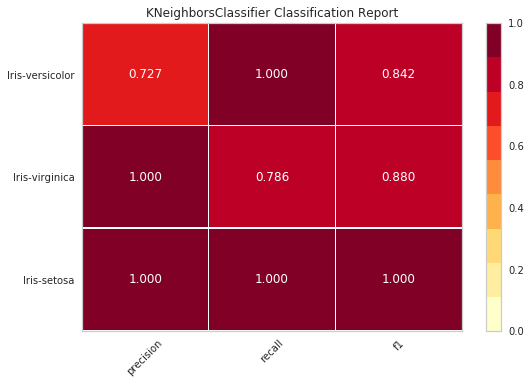

In [19]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(knn, classes=['Iris-setosa','Iris-virginica', 'Iris-versicolor'])

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

## Logistic Regression in Sci-Kit Learn

In [48]:
df.groupby('target').describe()

sepal length                                              \
                       count   mean       std  min    25%  50%  75%  max   
target                                                                     
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal width         ... petal length      petal width         \
                      count   mean  ...          75%  max       count   mean   
target                              ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
target                                              
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

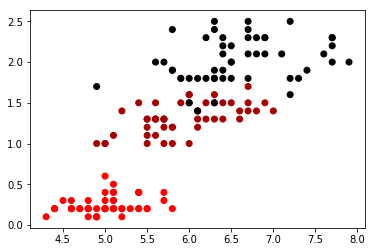

In [2]:
from sklearn import preprocessing

#Convert target columns in a numerical column of the iris dataframe
#creating labelEncoder object
le = preprocessing.LabelEncoder()

# Converting string(categorical) labels into numbers.
df.target = le.fit_transform(df.target) #iris setosa= 0, iris-versicolor=1, iris-virginica=2

#Separating out feature variables
x = df.iloc[:, :-1].values

#Separating out target variables
y = df.iloc[:, 4].values

plt.scatter(x[:,0], x[:, 3], c=y, cmap ='flag')

plt.show()

## Get the accuracy of the Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics #from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


#Separating out feature variables
X = df.iloc[:, :-1].values

#Separating out target variable
y = df.iloc[:, 4].values

#Split arrays or matrices into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#create an object of the type Logistic Regression
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)

#train the algorithm on training data and predict using the testing data
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, y_test))

#Check precision, recall, f1-score
print('The classification report of the Logistic Regression\n', classification_report(y_test, prediction) )

The accuracy of the Logistic Regression is 1.0
The classification report of the Logistic Regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Performance Comparison

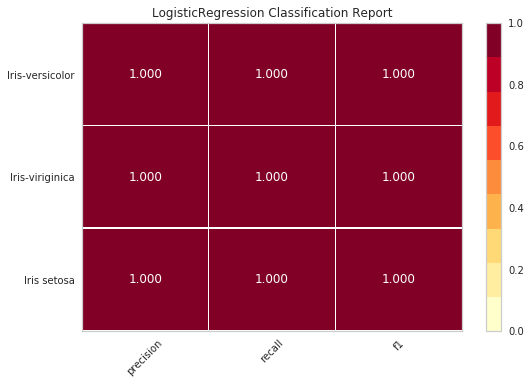

In [26]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model, classes=['Iris setosa', 'Iris-viriginica', 'Iris-versicolor'])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

g=visualizer.poof() 

## Naives Bayes
assumes every pair of features are independent.

In [10]:
# import the necessary module
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Separating out feature variables
X = df.iloc[:, :-1].values

#Separating out target variable
y = df.iloc[:, 4].values

#Split arrays or matrices into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#create an object of the type GaussianNB
gnb = GaussianNB()
print("GNB: ", gnb)
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(X_train, y_train).predict(X_test)
print(pred.tolist())

print("Naive-Bayes accuracy : ", accuracy_score(y_test, pred, normalize = True))

GNB:  GaussianNB(priors=None, var_smoothing=1e-09)
[2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1]
Naive-Bayes accuracy :  0.9333333333333333


### Performance Comparison
used to visualize performance score

In [5]:
import sys
! {sys.executable} -m pip install yellowbrick

  Using cached https://files.pythonhosted.org/packages/13/95/a14e4fdfb8b1c8753bbe74a626e910a98219ef9c87c6763585bbd30d84cf/yellowbrick-1.1-py3-none-any.whl


/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


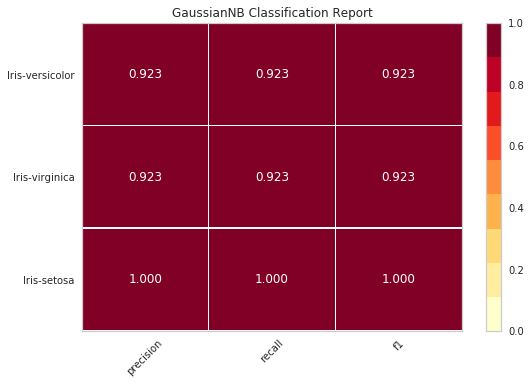

In [12]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Iris-setosa','Iris-virginica', 'Iris-versicolor'])

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

## LinearSVC
a subclass of the SVM (Support Vector Machine) class. On a very basic level LinearSVC tries to divide the data into different planes so that it can find a best possible grouping of different classes.

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)

#train the algorithm on training data and predict using the testing data
pred=svc_model.fit(X_train, y_train).predict(X_test)

print("Linear SVC accuracy", accuracy_score(y_test, pred,normalize=True))

Linear SVC accuracy 0.9


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Performance Comparison

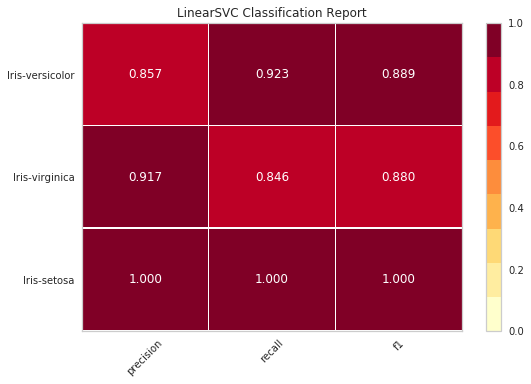

In [15]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Iris-setosa','Iris-virginica', 'Iris-versicolor'])

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

## Standardize the Data

In [9]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width'] #don't worry about the target column-it contains text

#Separating out the "features" from "target" column
x = df.loc[:, features] #all rows and the columns 'sepal length', 'sepal width', 'petal length', 'petal width'
print(x.head(10))

#Separating out the "target" from "features" column
y = df.loc[:, ['target']] #all rows and last column

#Standardizing the features
x = StandardScaler().fit_transform(x) #mean = 0 and variance=1

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalComponents

principalDf = pd.DataFrame(data=principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head(10)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
5,-2.070537,1.518549
6,-2.445711,0.074563
7,-2.233842,0.247614
8,-2.341958,-1.095146
9,-2.188676,-0.448629


In [6]:
finalDf = pd.concat([principalDf, df['target']], axis=1) #combining principal Df and target column together
finalDf.head(10)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa


## A little overview of loc

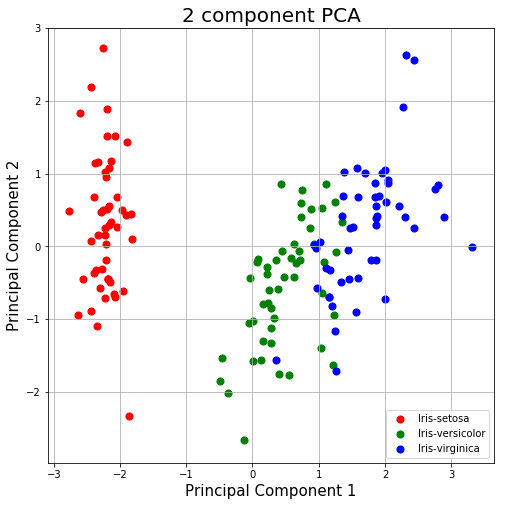

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
              ,finalDf.loc[indicesToKeep, 'principal component 2'] 
              ,c = color
              ,s = 50)
ax.legend(targets) #adds box highlighting what color point is to which label
ax.grid() #add light grey grid lines

In [8]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## Missing and Nan Values

In [4]:
df.isna

<bound method DataFrame.isna of      5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
5    4.6  3.4  1.4  0.3     Iris-setosa
6    5.0  3.4  1.5  0.2     Iris-setosa
7    4.4  2.9  1.4  0.2     Iris-setosa
8    4.9  3.1  1.5  0.1     Iris-setosa
9    5.4  3.7  1.5  0.2     Iris-setosa
10   4.8  3.4  1.6  0.2     Iris-setosa
11   4.8  3.0  1.4  0.1     Iris-setosa
12   4.3  3.0  1.1  0.1     Iris-setosa
13   5.8  4.0  1.2  0.2     Iris-setosa
14   5.7  4.4  1.5  0.4     Iris-setosa
15   5.4  3.9  1.3  0.4     Iris-setosa
16   5.1  3.5  1.4  0.3     Iris-setosa
17   5.7  3.8  1.7  0.3     Iris-setosa
18   5.1  3.8  1.5  0.3     Iris-setosa
19   5.4  3.4  1.7  0.2     Iris-setosa
20   5.1  3.7  1.5  0.4     Iris-setosa
21   4.6  3.6  1.0  0.2     Iris-setosa
22   5.1  3.3  1.7  0.5     Iris-setosa
23   4.8